In [1]:
import pandas as pd
import numpy as np

In [5]:
drinks=pd.read_csv("http://bit.ly/drinksbycountry")
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [18]:

drinks["beer_servings"]=drinks.beer_servings.astype(float)
drinks.head()


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0,0,0.0,Asia
1,Albania,89.0,132,54,4.9,Europe
2,Algeria,25.0,0,14,0.7,Africa
3,Andorra,245.0,138,312,12.4,Europe
4,Angola,217.0,57,45,5.9,Africa


In [19]:
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [26]:
drinks=pd.read_csv("http://bit.ly/drinksbycountry",dtype={"beer_servings":float,"wine_servings":float})
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                   float64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [55]:
orders =pd.read_table("http://bit.ly/chiporders")
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [56]:
orders.item_price=orders.item_price.str.replace('$','').astype(float)
orders.head()

orders.item_price.mean()


7.464335785374397

In [73]:
drinks=pd.read_csv("http://bit.ly/drinksbycountry")
drinks[(drinks.continent=="Asia") & (drinks.country=='India')]



,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
77,India,9,114,0,2.2,Asia


In [67]:
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [69]:
drinks.groupby('continent').beer_servings.agg(['count','min','max','mean'])

,count,min,max,mean
continent,,,,
Africa,53,0,376,61.471698
Asia,44,0,247,37.045455
Europe,45,0,361,193.777778
North America,23,1,285,145.434783
Oceania,16,0,306,89.687500
South America,12,93,333,175.083333


In [74]:
%matplotlib inline

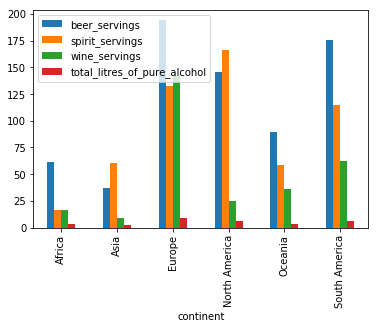

In [76]:
drinks.groupby('continent').mean().plot(kind='bar')

In [95]:
movies=pd.read_csv("http://bit.ly/imdbratings")
movies.head()


,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [92]:
#movies.genre.unique()
movies.genre.nunique()

16

In [93]:
movies.genre.describe()
#movies[movies.genre=="Drama"]
movies.genre.value_counts(normalize=True)


Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Thriller     0.005107
Sci-Fi       0.005107
Film-Noir    0.003064
Family       0.002043
Fantasy      0.001021
History      0.001021
Name: genre, dtype: float64

In [98]:
pd.crosstab(movies.genre,movies.content_rating)

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0
Animation,3,20,0,0,3,0,25,5,5,0,1,0
Biography,1,2,1,0,1,0,6,29,36,0,0,0
Comedy,9,2,1,1,16,3,23,23,73,0,4,1
Crime,6,0,0,1,7,1,6,4,87,0,11,1
Drama,12,3,0,4,24,1,25,55,143,1,9,1
Family,0,1,0,0,0,0,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0


In [100]:
movies.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

In [106]:
movies.duration.unique()

array([142, 175, 200, 152, 154,  96, 161, 201, 195, 139, 178, 148, 124,
       179, 169, 133, 207, 146, 121, 136, 130, 106, 127, 116, 118, 110,
        87, 125, 112, 102, 107, 119, 115, 109, 189, 150, 165, 155, 137,
       113,  95, 151, 153,  89, 117,  88, 170,  99,  98, 156, 122, 149,
       134, 157, 123, 128, 120, 229, 103, 177, 129, 216,  93,  68, 108,
       181, 138, 160, 126,  91, 143, 132, 183, 140,  81, 131, 172, 162,
        86, 186, 224, 180, 105, 238, 182,  92, 100, 135,  94,  83, 163,
       167, 188, 111, 101, 212, 114, 158, 191, 147, 174,  85, 184,  67,
       141, 104,  80,  84, 145,  76,  82, 197,  66, 144,  70,  90,  97,
        64,  75, 193, 159, 220, 242,  78, 166,  79, 187, 194, 202, 168,
       164,  69, 205], dtype=int64)

In [108]:
movies[movies.duration==142]

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
13,8.8,Forrest Gump,PG-13,Drama,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']"
551,7.8,Harry Potter and the Prisoner of Azkaban,PG,Adventure,142,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
647,7.7,La grande bellezza,NOT RATED,Drama,142,"[u'Toni Servillo', u'Carlo Verdone', u'Sabrina..."


In [111]:
movies.duration.value_counts()

112    23
113    22
102    20
101    20
129    19
120    18
105    18
126    18
98     18
130    18
100    17
121    17
116    17
124    16
122    16
118    16
115    16
96     16
104    16
110    16
107    16
109    16
119    15
114    15
99     15
108    15
94     14
117    14
106    14
93     14
       ..
70      1
69      1
67      1
66      1
242     1
238     1
195     1
229     1
224     1
220     1
216     1
212     1
207     1
205     1
202     1
201     1
200     1
194     1
159     1
193     1
187     1
186     1
184     1
183     1
182     1
180     1
177     1
168     1
166     1
64      1
Name: duration, dtype: int64

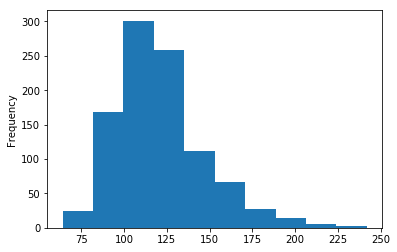

In [113]:
movies.duration.plot(kind="hist")

In [115]:
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

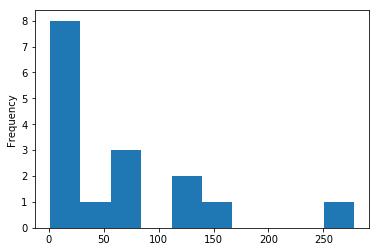

In [124]:
movies.genre.value_counts().plot(kind='hist')

In [3]:
ufo=pd.read_csv("http://bit.ly/uforeports")
ufo.tail()

,City,Colors Reported,Shape Reported,State,Time
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45
18240,Ybor,NaN,OVAL,FL,12/31/2000 23:59


In [9]:
pd.Series([True,False,True,True]).sum()

3

In [17]:
ufo.isnull().sum()

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [13]:
ufo.notnull().sum()

City               18216
Colors Reported     2882
Shape Reported     15597
State              18241
Time               18241
dtype: int64

In [21]:
ufo[ufo["City"].isnull()]

,City,Colors Reported,Shape Reported,State,Time
21,NaN,NaN,NaN,LA,8/15/1943 0:00
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00
204,NaN,NaN,DISK,CA,7/15/1952 12:30
241,NaN,BLUE,DISK,MT,7/4/1953 14:00
613,NaN,NaN,DISK,NV,7/1/1960 12:00
1877,NaN,YELLOW,CIRCLE,AZ,8/15/1969 1:00
2013,NaN,NaN,NaN,NH,8/1/1970 9:30
2546,NaN,NaN,FIREBALL,OH,10/25/1973 23:30
3123,NaN,RED,TRIANGLE,WV,11/25/1975 23:00
4736,NaN,NaN,SPHERE,CA,6/23/1982 23:00


In [23]:
ufo.dropna(how='any').shape

(2486, 5)

In [24]:
ufo.dropna(how='all').shape

(18241, 5)

In [29]:
ufo.isnull().sum()

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [30]:
ufo.shape

(18241, 5)

In [38]:
ufo.dropna(subset=["City","State"],how="any").shape

(18216, 5)

In [46]:
ufo.shape
ufo["Shape Reported"].fillna(value="Kaushik",inplace=True)

In [48]:
ufo["Shape Reported"].value_counts(dropna=False)

LIGHT        2801
Kaushik      2640
DISK         2119
TRIANGLE     1885
OTHER        1402
CIRCLE       1362
SPHERE       1052
FIREBALL     1037
OVAL          844
CIGAR         617
FORMATION     433
VARIOUS       332
RECTANGLE     302
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           196
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
ROUND           2
CRESCENT        2
PYRAMID         1
HEXAGON         1
DOME            1
FLARE           1
Name: Shape Reported, dtype: int64

In [61]:
drinks=pd.read_csv("http://bit.ly/drinksbycountry")
drinks.index

RangeIndex(start=0, stop=193, step=1)

In [54]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [56]:
drinks.loc[3,"beer_servings"]

245

In [62]:
drinks.set_index("country",inplace=True)

In [63]:
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [74]:
import pandas as pd
drinks=pd.read_csv("http://bit.ly/drinksbycountry")
#drinks.index
drinks.set_index('country',inplace=True)
drinks.loc['Brazil','beer_servings']

245

In [79]:
drinks.describe().loc["25%","beer_servings"]

20.0

In [80]:
drinks=pd.read_csv("http://bit.ly/drinksbycountry")
#drinks.index
drinks.set_index('country',inplace=True)
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [83]:
drinks.index.name=None
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [86]:
drinks=pd.read_csv("http://bit.ly/drinksbycountry")
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [88]:
drinks.continent.value_counts()

Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

In [94]:
drinks.continent.value_counts().loc["Africa"]
drinks.set_index('country',inplace=True)

In [92]:
people=pd.Series([3000000,50000],index=['Algeria','Andorra'],name='population')
people


Algeria    3000000
Andorra      50000
Name: population, dtype: int64

In [99]:
drinks.beer_servings*people

Afghanistan                    NaN
Albania                        NaN
Algeria                 75000000.0
Andorra                 12250000.0
Angola                         NaN
Antigua & Barbuda              NaN
Argentina                      NaN
Armenia                        NaN
Australia                      NaN
Austria                        NaN
Azerbaijan                     NaN
Bahamas                        NaN
Bahrain                        NaN
Bangladesh                     NaN
Barbados                       NaN
Belarus                        NaN
Belgium                        NaN
Belize                         NaN
Benin                          NaN
Bhutan                         NaN
Bolivia                        NaN
Bosnia-Herzegovina             NaN
Botswana                       NaN
Brazil                         NaN
Brunei                         NaN
Bulgaria                       NaN
Burkina Faso                   NaN
Burundi                        NaN
Cabo Verde          

In [103]:
pd.concat([drinks,people],axis=1).head()


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,population
Afghanistan,0,0,0,0.0,Asia,NaN
Albania,89,132,54,4.9,Europe,NaN
Algeria,25,0,14,0.7,Africa,3000000.0
Andorra,245,138,312,12.4,Europe,50000.0
Angola,217,57,45,5.9,Africa,NaN


In [104]:
drinks.sort_values(["continent"]).head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Liberia,19,152,2,3.1,Africa
Mali,5,1,1,0.6,Africa
Malawi,8,11,1,1.5,Africa
Madagascar,26,15,4,0.8,Africa
Libya,0,0,0,0.0,Africa
